# PS1-3. Poisson Regression

#### (a)

We could dervive that
\begin{align*}
p(y; \lambda) & = \frac{e^{- \lambda} \lambda^y}{y !} \\
                & = \frac{1}{y !} \exp (y \log \lambda - \lambda) \\
                & = b(y) \exp(\eta^T T(y) - a(\eta))
\end{align*}

where $b(y) = \frac{1}{y  !}$, $T(y) = y$, $\eta = \log \lambda$ and $a(\eta) = \exp(\eta)$.

#### (b)

We have the canonical response function for the family
$$\mathbb{E}[T(y);\eta] = \mathbb{E}[y;\eta] =\lambda$$
which is 
$$\mathbb{E}[T(y);\eta] = \exp(\eta)$$

#### (c)

Recall the design choices of GLM:

+ $y \vert x; \theta \sim \mathrm{ExponentialFamily} (\eta)$

+ $h(x) = \mathbb{E} [y \vert x]$

+ $\eta = \theta^T x$

Consider the log-likelihood:
\begin{align*}
\ell (\theta) & = \log p(y^{(i)} \vert x^{(i)}; \ \theta) \\
              & = \log \left( b(y^{(i)}) \exp (\eta^T T(y^{(i)}) - a(\eta)) \right)\\
              & = \log (\frac{1}{y^{(i)}!}) + y^{(i)} \log(\lambda) - \lambda
\end{align*}

Recall that
$$h(x) = \mathbb{E} [y \vert x] = \lambda = \exp(\eta)$$
where $\eta = \theta^T x$

Hence, we could derive
$$\ell (\theta) = \log (\frac{1}{y^{(i)}!}) + y^{(i)} (\theta^T x^{(i)}) - \exp(\theta^T x^{(i)})$$

Take the derivative w.r.t. $\theta$,
\begin{align*}
\frac{\partial}{\partial \theta} \ell(\theta) 
    &= x^{(i)} y^{(i)}  - x^{(i)}\exp(\theta^T x^{(i)}) \\
    &= \left( y^{(i)} - h_{\theta}(x^{(i)}) \right) x^{(i)}
\end{align*}

The stochastic gradient ascent update rule is:
$$\theta := \theta + \alpha \left( y^{(i)} - h_\theta (x^{(i)}) \right) x^{(i)}$$

#### (d)

In this problem, we apply poisson regression to model the number of visitors per day.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import src.util as util

from src.linear_model import LinearModel

In [2]:
x_train, y_train = util.load_dataset('data/ds4_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset('data/ds4_valid.csv', add_intercept=True)

Then we begin to implement the poisson regression with stochastic gradient descent:

In [3]:
class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        
        > clf.fit(x_train, y_train)
        
        > clf.predict(x_eval)
    """
    
    def h(self, x, theta):
        return np.exp(x @ theta) #(m, n) * (n,)
   
    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        def step(theta):
            return self.step_size / m * np.dot(x.T, y - self.h(x, theta)) #(n, m) * (m,)
        
        m, n = x.shape;
        
        # Initialize theta
        if self.theta is None:
            theta = np.zeros(n);
        else:
            theta = self.theta
        
        # Update theta
        while True:
            delta_theta = step(theta)
            if np.linalg.norm(delta_theta, 1) < self.eps: 
                break
            theta += delta_theta
        self.theta = theta

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """
        return self.h(x, self.theta)

Adjust the learning rate and train the model:

In [4]:
clf = PoissonRegression(step_size=1e-7)
clf.fit(x_train, y_train)

Again we plot on the training set:

In [5]:
def plot(y_label, y_pred, title):
    plt.plot(y_label, 'go', label='label')
    plt.plot(y_pred, 'rx', label='prediction')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='upper left')

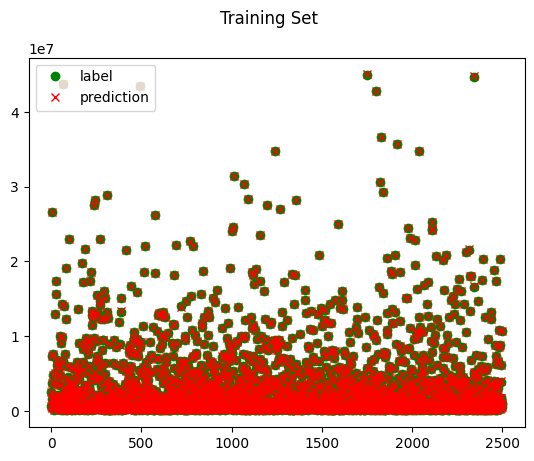

In [6]:
y_train_pred = clf.predict(x_train)
plot(y_train, y_train_pred, 'Training Set')

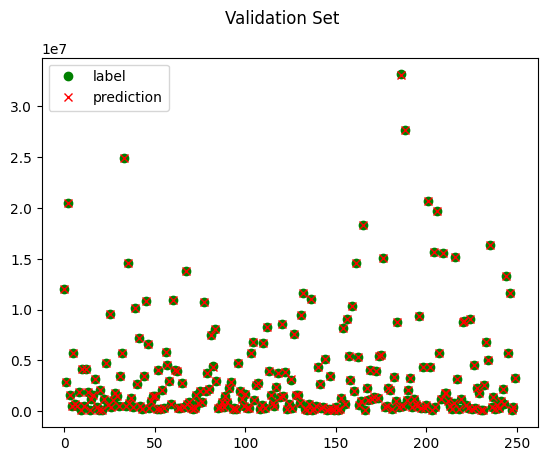

In [7]:
y_valid_pred = clf.predict(x_valid)
plot(y_valid, y_valid_pred, 'Validation Set')